In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as pl

In [2]:
import numpy as np
import os
from PIL import Image
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
n_train_data = 1800
n_test_data = 200
categoriesList=["airplane","automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
categoriesSet={"airplane":0 ,"automobile":1,"bird":2, "cat":3, "deer":4, "dog":5, "frog":6, "horse":7, "ship":8, "truck":9}

In [4]:
def load_via_dir(directory, n_max_datapoints, n_test):
  print("Loading data of path: " + directory)
  data_train_picture=[]
  data_train_label=[]  
  data_test_picture=[]
  data_test_label=[] 
  i=0
  for filename in os.listdir(directory):
      if filename.endswith(".png"): 
        #print(os.path.join(directory, filename))
        picture = np.asarray(Image.open(os.path.join(directory, filename)))
        name, numpng = filename.split("_",2)
        num, png = numpng.split(".",1) 
        n_max_train = (n_max_datapoints - n_test)/len(categoriesSet)
        if int(num) < n_max_train + 1:        
          data_train_picture.append(picture)
          data_train_label.append(categoriesSet[name])
        else:
          data_test_picture.append(picture)
          data_test_label.append(categoriesSet[name])        
        
        if i % 100 == 0 and i != 0:
           print(str(i)+ " of " + str(n_train_data + n_test_data) + " pictures loaded.")
        i=i+1
        
        if(n_max_datapoints==len(data_train_picture) + len(data_test_picture)):
          print(str(len(data_train_picture) + len(data_test_picture))+" pictures loaded.")
          return data_train_picture, data_train_label, data_test_picture, data_test_label
        continue
      else:
          continue
          
data_train_picture, data_train_label, data_test_picture, data_test_label = load_via_dir('/content/gdrive/MyDrive/2000pics_cifar10', n_train_data+n_test_data, n_test_data)

Loading data of path: /content/gdrive/MyDrive/2000pics_cifar10
100 of 2000 pictures loaded.
200 of 2000 pictures loaded.
300 of 2000 pictures loaded.
400 of 2000 pictures loaded.
500 of 2000 pictures loaded.
600 of 2000 pictures loaded.
700 of 2000 pictures loaded.
800 of 2000 pictures loaded.
900 of 2000 pictures loaded.
1000 of 2000 pictures loaded.
1100 of 2000 pictures loaded.
1200 of 2000 pictures loaded.
1300 of 2000 pictures loaded.
1400 of 2000 pictures loaded.
1500 of 2000 pictures loaded.
1600 of 2000 pictures loaded.
1700 of 2000 pictures loaded.
1800 of 2000 pictures loaded.
1900 of 2000 pictures loaded.
2000 pictures loaded.


In [5]:
x_train = np.asarray(data_train_picture)
y_train = np.asarray(data_train_label)
x_test = np.asarray(data_test_picture)
y_test = np.asarray(data_test_label)

In [6]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1800, 32, 32, 3)
1800 train samples
200 test samples


In [7]:
batch_size = 100
num_classes = 10
epochs = 50

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x_train /= 255
x_test /= 255

In [21]:
def initializeModel():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model

In [22]:
model2000 = initializeModel()

In [23]:
model2000.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [24]:
from tensorflow.keras import optimizers

In [24]:
model2000.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [25]:
from keras.callbacks import History 

In [26]:
history_noAug = History()
print('Not using data augmentation.')
model2000.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
         callbacks=[history_noAug],
         verbose=1)

Not using data augmentation.
Epoch 1/50
18/18 [==============================] - 2s 41ms/step - loss: 2.3029 - accuracy: 0.1011 - val_loss: 2.2981 - val_accuracy: 0.1050
Epoch 2/50
18/18 [==============================] - 0s 25ms/step - loss: 2.2441 - accuracy: 0.1300 - val_loss: 2.2468 - val_accuracy: 0.1600
Epoch 3/50
18/18 [==============================] - 0s 24ms/step - loss: 2.1654 - accuracy: 0.1817 - val_loss: 2.0896 - val_accuracy: 0.1850
Epoch 4/50
18/18 [==============================] - 0s 24ms/step - loss: 1.9717 - accuracy: 0.2394 - val_loss: 1.9937 - val_accuracy: 0.2650
Epoch 5/50
18/18 [==============================] - 0s 24ms/step - loss: 1.8877 - accuracy: 0.2650 - val_loss: 1.8502 - val_accuracy: 0.3400
Epoch 6/50
18/18 [==============================] - 0s 23ms/step - loss: 1.8131 - accuracy: 0.2956 - val_loss: 1.8390 - val_accuracy: 0.3650
Epoch 7/50
18/18 [==============================] - 0s 25ms/step - loss: 1.8226 - accuracy: 0.3100 - val_loss: 1.8403 - val_a

In [27]:
score = model2000.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.5199999809265137
Test loss: 1.8094990253448486


In [28]:
import matplotlib.pyplot as plt

In [29]:
def plotmetrics(history):
  width = 10
  height = 5
  ## Clear plot if repeated call
  plt.clf()
  plt.figure(figsize=(width, height))
  # Plot training & validation accuracy values
  plt.title('Model Metrics : Non Augmented Data')
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  pltoutput = plt.show()
  return pltoutput

<Figure size 432x288 with 0 Axes>

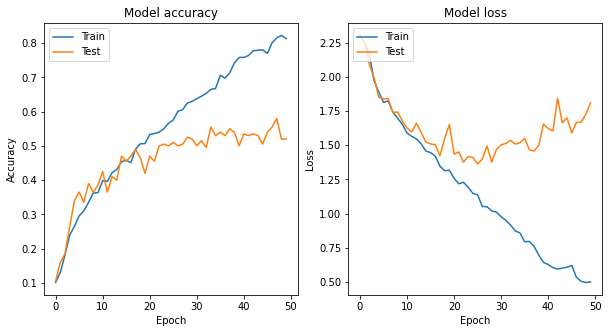

None

In [30]:
pltoutput = plotmetrics(history_noAug)
display(pltoutput)

In [31]:
categoriesList=["airplane","automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [32]:
import random
def plotImages(x_test, images_arr, labels_arr, n_images=8):
    fig, axes = plt.subplots(n_images, n_images, figsize=(9,9))
    axes = axes.flatten()
    
    for i in range(100):
        rand = random.randint(0, x_test.shape[0] -1)
        img = images_arr[rand]
        ax = axes[i]
    
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
        
        predictions = model2000.predict([[x_test[rand].reshape(1,32,32,3)]])
        predclasses  =np.argmax(predictions,axis=1)
        label=categoriesList[predclasses[0]]   
        
        if labels_arr[rand][predclasses[0]] == 0:
            ax.set_title(label, fontsize=18 - n_images, color="red") 
        else:
            ax.set_title(label, fontsize=18 - n_images) 
        
    plot = plt.tight_layout()
    return plot

None

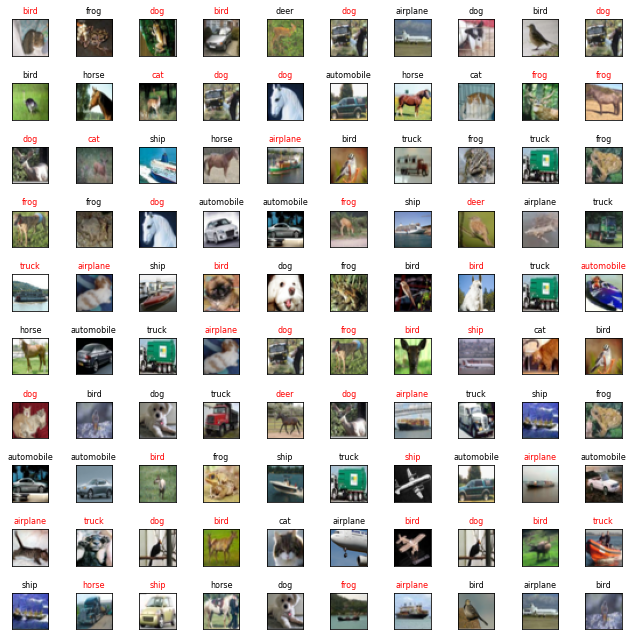

In [33]:
display(plotImages(x_test, data_test_picture, y_test, n_images=10))